## Some resources for book data: 

- https://www.kaggle.com/datasets/saurabhbagchi/books-dataset
- https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
- https://www.kaggle.com/datasets/abdallahwagih/books-dataset

### Actual APIs
- https://developers.google.com/books/docs/v1/using
- https://openlibrary.org/dev/docs/api/books
- https://developer.nytimes.com/docs/books-product/1/overview
- https://isbndb.com/blog/book-api/

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

from library.sb_utils import save_file

In [2]:
# data source: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
df = pd.read_csv('./data/data.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
df.shape

(6810, 12)

In [4]:
df.title

0                          Gilead
1                    Spider's Web
2                    The One Tree
3                  Rage of angels
4                  The Four Loves
                  ...            
6805                    I Am that
6806         Secrets Of The Heart
6807               Fahrenheit 451
6808     The Berlin Phenomenology
6809    'I'm Telling You Stories'
Name: title, Length: 6810, dtype: object

In [5]:
df.isna().sum()
# Drop all rows that have an nan maybe keep subtitle

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [6]:
# remove rows without authors, and also ... published_year? might be a lot of overlap
# df.dropna(subset=['A'], inplace=True)
df.dropna(subset=['authors', 'subtitle', 
                       'categories',
                       'thumbnail',
                       'description',
                       'published_year',
                       'average_rating',
                       'num_pages',
                       'ratings_count'],inplace=True)

In [7]:
df.shape

(2182, 12)

In [8]:
df.reset_index(drop=True, inplace=True)
df.head(10)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
1,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
2,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
3,9780006499626,0006499627,Miss Marple,The Complete Short Stories,Agatha Christie,"Detective and mystery stories, English",http://books.google.com/books/content?id=a96qP...,"Miss Marple featured in 20 short stories, publ...",1997.0,4.20,359.0,6235.0
4,9780006551812,0006551815,'Tis,A Memoir,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,495.0,44179.0
5,9780006754893,0006754899,A Small Pinch of Weather,And Other Stories,Joan Aiken,"Children's stories, English",http://books.google.com/books/content?id=QiFhO...,A magical and fantastic collection of early st...,2000.0,4.27,239.0,116.0
6,9780007105045,0007105045,Tree and Leaf,The Homecoming of Beorhtnoth : Beorhthelm's Son,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001.0,4.09,176.0,2245.0
7,9780007116263,0007116268,"The Lord of the Rings, the Return of the King",Visual Companion,Jude Fisher,Imaginary wars and battles,http://books.google.com/books/content?id=kNBnQ...,A visual guide to the third in the Lord of the...,2003.0,4.59,72.0,22.0
8,9780007135653,0007135653,The Lord of the Rings,The Art of The Return of the King,Gary Russell,Characters and characteristics in motion pictures,http://books.google.com/books/content?id=oEZ6A...,With complete access to artwork created over a...,2004.0,4.54,224.0,28.0
9,9780007137336,0007137338,Lirael,Daughter of the Clayr,Garth Nix,Fantasy fiction,http://books.google.com/books/content?id=sDzU8...,When a dangerous necromancer threatens to unle...,2004.0,4.30,527.0,1339.0


In [9]:
df.published_year.describe()

count    2182.000000
mean     1999.900092
std         8.613783
min      1925.000000
25%      1998.000000
50%      2002.000000
75%      2005.000000
max      2019.000000
Name: published_year, dtype: float64

<Axes: xlabel='published_year', ylabel='Count'>

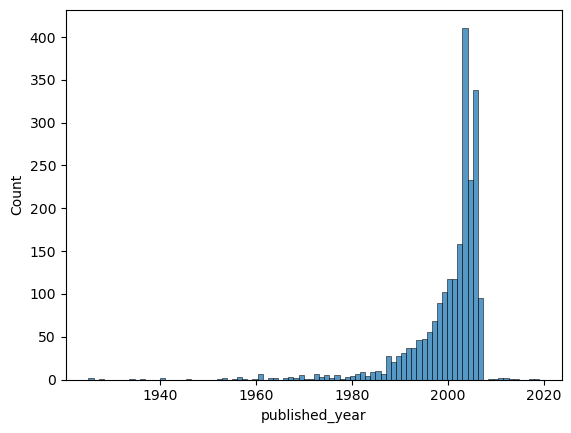

In [10]:
# plot a hist of publication years
sns.histplot(data = df, x = 'published_year')

In [11]:
df.average_rating.describe()

count    2182.000000
mean        3.945761
std         0.331848
min         0.000000
25%         3.770000
50%         3.980000
75%         4.150000
max         5.000000
Name: average_rating, dtype: float64

<Axes: xlabel='average_rating', ylabel='Count'>

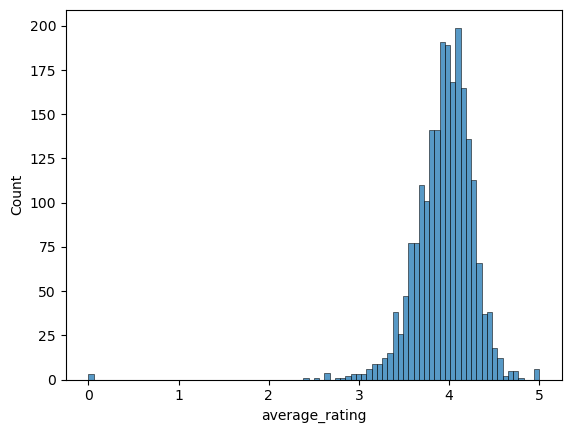

In [12]:
# plot hist of average_ratings
sns.histplot(data = df, x = 'average_rating')

In [13]:
df.num_pages.describe()

count    2182.000000
mean      352.815307
std       238.069494
min         0.000000
25%       224.000000
50%       310.000000
75%       416.750000
max      3342.000000
Name: num_pages, dtype: float64

<Axes: xlabel='num_pages', ylabel='Count'>

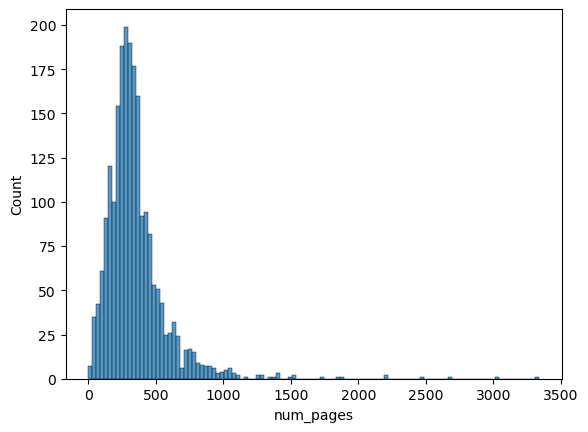

In [14]:
# hist of page number
sns.histplot(data = df, x = 'num_pages')

In [15]:
df['ratings_count'].describe

<bound method NDFrame.describe of 0        5164.0
1          65.0
2         103.0
3        6235.0
4       44179.0
         ...   
2177      373.0
2178       65.0
2179       27.0
2180      104.0
2181       10.0
Name: ratings_count, Length: 2182, dtype: float64>

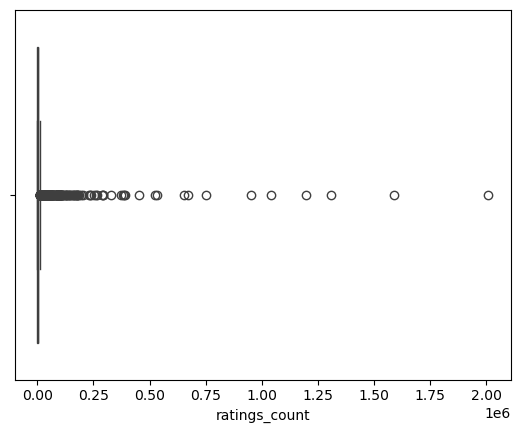

In [16]:
sns.boxplot(data = df, x = 'ratings_count');
# This makes about as much sense as the hist plot, but does a better job of highlighting the outliers and where they fall.

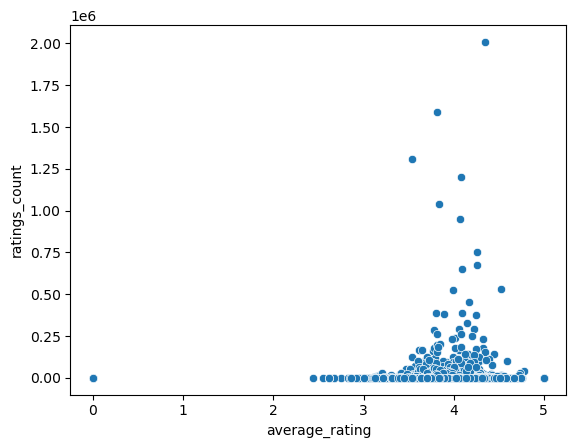

In [17]:
# Some extreme outliers here, including very few 0 star reviews, and then a huge gap until 2.5 stars. Some of these books are very 
# commonly rated - can I include number of reviews in the model somehow? 
sns.scatterplot(x=df.average_rating, y=df.ratings_count);

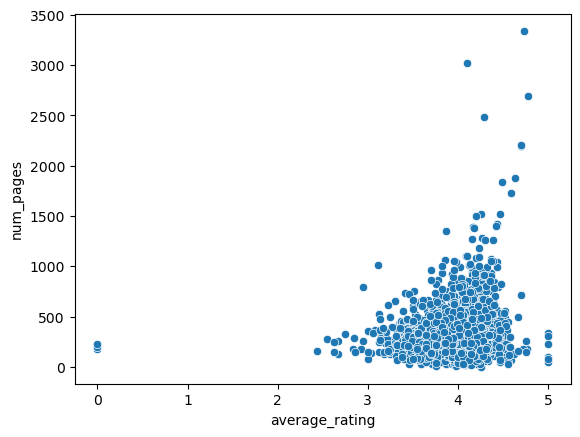

In [18]:
# plot a scatter plot of num_pages vs ratings
# Interesting potential correlation - I guess if someone sticks around for more than 1000 pages they are more likely to highly rate the book
sns.scatterplot(x=df.average_rating, y=df.num_pages);

In [19]:
df.categories.unique()
# wow some of these categories are very specific, e.g., 'Estados Unidos - Relaciones exteriores - 1945-1989' or 'Building laws'
# keep just in case for llm analysis - consider keywords

array(['Detective and mystery stories', 'Africa, East',
       'Hyland, Morn (Fictitious character)',
       'Detective and mystery stories, English', 'Ireland',
       "Children's stories, English", 'Literary Collections',
       'Imaginary wars and battles',
       'Characters and characteristics in motion pictures',
       'Fantasy fiction', 'Hallucinogenic drugs', 'Fiction',
       'Baggins, Frodo (Fictitious character)', 'Authors',
       'Conduct of life', 'Alienation (Social psychology)', 'Cowboys',
       'History', 'Juvenile Fiction', 'Literary Criticism', 'Science',
       'Biography & Autobiography', 'Family & Relationships',
       'Juvenile Nonfiction', 'Business & Economics', 'Poetry',
       'Self-Help', 'Sports & Recreation', 'True Crime', 'Psychology',
       'Religion', 'Travel', 'Social Science', 'Health & Fitness',
       'Music', 'Political science', 'Medical', 'Philosophy',
       'Body, Mind & Spirit', 'Language Arts & Disciplines', 'Education',
       'Political

In [20]:
# An example of a description - possibly good text to mine for a recommendation, in conjunction with reviews
df.description[0]

"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'

In [21]:
url = df.thumbnail[0]
url

'http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api'

![test thumbnail](http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api)

In [22]:
url_2 = df.thumbnail[1]
url_2

'http://books.google.com/books/content?id=MuPEQgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api'

Cannot seem to use a variable, but have to put the url minus the quotes to get the image

![second test image](http://books.google.com/books/content?id=MuPEQgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api)

In [23]:
import os
from dotenv import load_dotenv

load_dotenv()
NYT_API_KEY = os.getenv('NYT_API_KEY')

In [24]:
print(NYT_API_KEY)

9BHVqSsbgbkBfyA1T7afMdvlK6qftDZu


In [25]:
base_api = 'https://api.nytimes.com/svc/books/v3/'
reviews = 'reviews.json?'
lists = 'lists/current/hardcover-fiction.json'
review_api_key = '&api-key=' + NYT_API_KEY
list_api_key = '?api-key=' + NYT_API_KEY

In [26]:
books = base_api + reviews + 'title=Fahrenheit+451' + review_api_key
books

'https://api.nytimes.com/svc/books/v3/reviews.json?title=Fahrenheit+451&api-key=9BHVqSsbgbkBfyA1T7afMdvlK6qftDZu'

In [27]:
r = requests.get(books)

In [28]:
data = r.json()
print(type(data))
data

<class 'dict'>


{'status': 'OK',
 'copyright': 'Copyright (c) 2025 The New York Times Company.  All Rights Reserved.',
 'num_results': 1,
 'results': [{'url': 'http://www.nytimes.com/2014/11/23/books/review/fahrenheit-451-read-by-tim-robbins.html',
   'publication_dt': '2014-11-23',
   'byline': 'DAVE ITZKOFF',
   'book_title': 'Fahrenheit 451',
   'book_author': 'Ray Bradbury',
   'summary': 'Is “Fahrenheit 451” a parable about censorship or an indictment of the cultural distraction of technology?',
   'uuid': '00000000-0000-0000-0000-000000000000',
   'uri': 'nyt://book/00000000-0000-0000-0000-000000000000',
   'isbn13': ['9781451673319']}]}

Notes: don't concatenate, merge if I bring in data from another source / api. Also keeping the NYT API example in case this or the Google API proves useful. 

In [29]:
# export cleaned dataset
df.isna().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [33]:
datapath = './data'
save_file(df, 'cleaned_df.csv', datapath)

Writing file.  "./data/cleaned_df.csv"
